# K-Nearest Neighbour Regression

### Danny Rachmadian Yusuf Satryatama

## Import Libaries and Load the Dataset

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [18]:
# Load the dataset
df = pd.read_csv('students_social_media_preprocessed.csv')

## Data Exploration

In [8]:
# Display the first few rows of the dataframe
print("Dataset Head:")
print(df.head())

# Display dataset info
print("\nDataset Info:")
df.info()

Dataset Head:
        Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
0 -1.186915               0.223857              -0.327638   
1  0.958662              -2.243309               0.560423   
2 -0.471723               0.860545              -1.659730   
3 -1.902108              -1.527035               0.116393   
4  0.243470              -0.333245              -0.771668   

   Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  \
0            -0.205520                     0.157063        0.985550   
1             1.605628                    -2.976790       -2.166958   
2            -1.111095                     1.201681        1.616052   
3             0.700054                    -1.932172       -1.536456   
4            -0.205520                    -0.887554        0.355048   

   Gender_Encoded  Affects_Academic_Performance_Encoded  \
0               0                                     1   
1               1                                     0   
2              

,0
Age,0
Avg_Daily_Usage_Hours,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0
Conflicts_Over_Social_Media,0
...,...
Usage_Category_Encoded,0
Adequate_Sleep,0
Mental_Health_Risk_Encoded,0
SM_Impact_Score,0


In [9]:
# Statistical summary
print("Statistical Summary")
print("="*50)
df.describe()

Statistical Summary


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Encoded,Affects_Academic_Performance_Encoded,Academic_Level_Graduate,Academic_Level_High School,...,Country_Switzerland,Country_Turkey,Country_UAE,Country_UK,Country_USA,Usage_Category_Encoded,Adequate_Sleep,Mental_Health_Risk_Encoded,SM_Impact_Score,Lifestyle_Balance
count,7.050000e+02,7.050000e+02,7.050000e+02,7.050000e+02,705.000000,7.050000e+02,705.000000,705.000000,705.000000,705.000000,...,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,-9.070758e-16,1.411007e-16,-2.721227e-16,-2.872407e-16,0.000000,-1.209434e-16,0.499291,0.642553,0.460993,0.038298,...,0.038298,0.038298,0.011348,0.031206,0.056738,1.960284,0.472340,1.363121,0.370719,0.040738
std,1.000710e+00,1.000710e+00,1.000710e+00,1.000710e+00,1.000710,1.000710e+00,0.500354,0.479588,0.498830,0.192051,...,0.192051,0.192051,0.105994,0.173997,0.231505,0.670913,0.499589,0.562867,0.300744,0.353827
min,-1.902108e+00,-2.720825e+00,-2.725403e+00,-2.016669e+00,-2.976790,-2.797459e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-1.186915e+00,-6.515892e-01,-7.716685e-01,-1.111095e+00,-0.887554,-9.059547e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,-0.248768
50%,2.434698e-01,-9.448721e-02,2.758658e-02,-2.055204e-01,0.157063,3.550484e-01,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.457143,0.071429
75%,9.586624e-01,7.013728e-01,7.380355e-01,7.000540e-01,1.201681,9.855500e-01,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.614286,0.306897
max,2.389048e+00,2.850195e+00,2.425352e+00,2.511203e+00,2.246298,1.616052e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,0.900000


In [12]:
# Check Null Values
print("\nNull Values:")
df.isna().sum().sort_values(ascending=False)


Null Values:


,0
Age,0
Avg_Daily_Usage_Hours,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0
Conflicts_Over_Social_Media,0
...,...
Usage_Category_Encoded,0
Adequate_Sleep,0
Mental_Health_Risk_Encoded,0
SM_Impact_Score,0


In [14]:
print("Dataset Information")
print("="*50)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn Information:")
df.info()

print("\nColumn Names:")
print(df.columns.tolist())

Dataset Information
Number of rows: 705
Number of columns: 64

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 64 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   705 non-null    float64
 1   Avg_Daily_Usage_Hours                 705 non-null    float64
 2   Sleep_Hours_Per_Night                 705 non-null    float64
 3   Mental_Health_Score                   705 non-null    float64
 4   Conflicts_Over_Social_Media           705 non-null    float64
 5   Addicted_Score                        705 non-null    float64
 6   Gender_Encoded                        705 non-null    int64  
 7   Affects_Academic_Performance_Encoded  705 non-null    int64  
 8   Academic_Level_Graduate               705 non-null    int64  
 9   Academic_Level_High School            705 non-null    int64  
 10  Aca

## Defining Features and Target


Target variable 'Addicted_Score' statistics:
count    7.050000e+02
mean    -1.209434e-16
std      1.000710e+00
min     -2.797459e+00
25%     -9.059547e-01
50%      3.550484e-01
75%      9.855500e-01
max      1.616052e+00
Name: Addicted_Score, dtype: float64


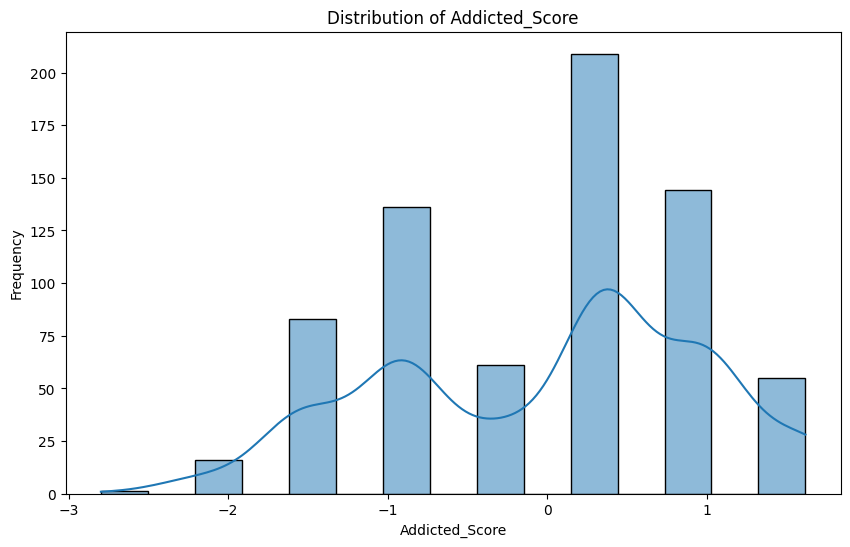


Top 10 features correlated with Addicted_Score:
Addicted_Score                          1.000000
Conflicts_Over_Social_Media             0.933586
SM_Impact_Score                         0.913976
Affects_Academic_Performance_Encoded    0.866049
Avg_Daily_Usage_Hours                   0.832000
Usage_Category_Encoded                  0.755325
Country_USA                             0.334492
Platform_TikTok                         0.330558
Country_Frequency                       0.236864
Academic_Level_High School              0.201333
Country_India                           0.192806
Name: Addicted_Score, dtype: float64


In [22]:
# Target variable analysis
target = 'Addicted_Score'
print(f"\nTarget variable '{target}' statistics:")
print(df[target].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df[target], kde=True, bins=15)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('Frequency')
plt.show()

# Correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numeric_columns].corr()

# Get top 10 features most correlated with target
top_corr = correlation[target].sort_values(ascending=False)
print("\nTop 10 features correlated with Addicted_Score:")
print(top_corr[:11])  # 11 because the first one is the target itself

In [24]:
# Define X (features) by dropping all columns except target
X = df.drop(['Addicted_Score'], axis=1)

# Define y (target)
y = df['Addicted_Score']

random_state = 42

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

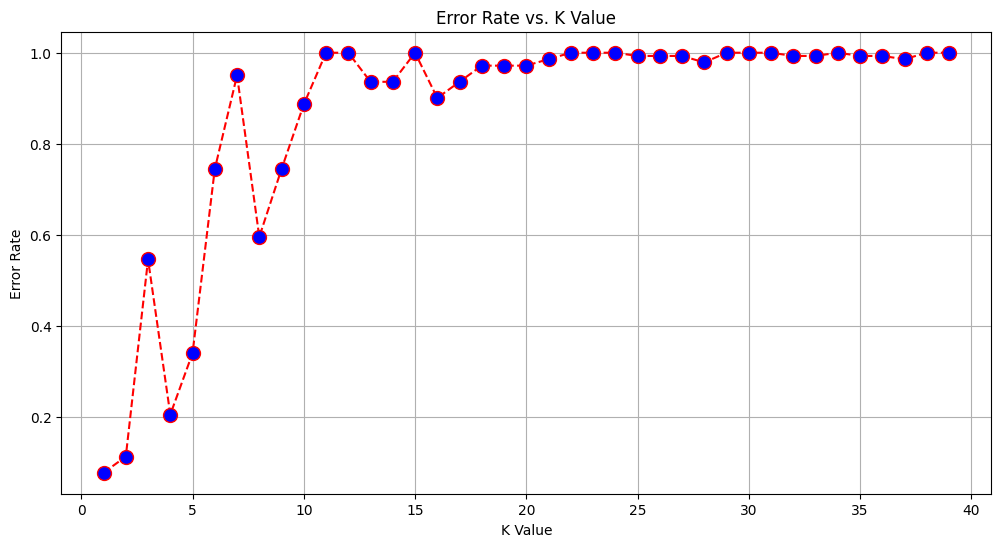

In [31]:
error_rate = []
k_range = range(1, 40) # Test k values from 1 to 39

for i in k_range:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # The error rate is the mean of where predictions are not equal to the actual values
    error_rate.append(np.mean(pred_i != y_test))

# Create a plot to visualize the Error Rate vs. K Value
plt.figure(figsize=(12, 6))
plt.plot(k_range, error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

## Train Models and Make Predictions with Model Performance

In [33]:
# Find the 'k' with the lowest error from the error_rate list
# We add 1 because the list index starts at 0, while k_range starts at 1
optimal_k = k_range[np.argmin(error_rate)]
print(f"Optimal 'k' value found is: {optimal_k}\n")

# Initialize the final KNN model with the optimal 'k'
knn = KNeighborsRegressor(n_neighbors=optimal_k)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

Optimal 'k' value found is: 1



Mean Absolute Error: 0.0760
Mean Squared Error: 0.0930
Root Mean Squared Error: 0.3050

Prediction Visualization:


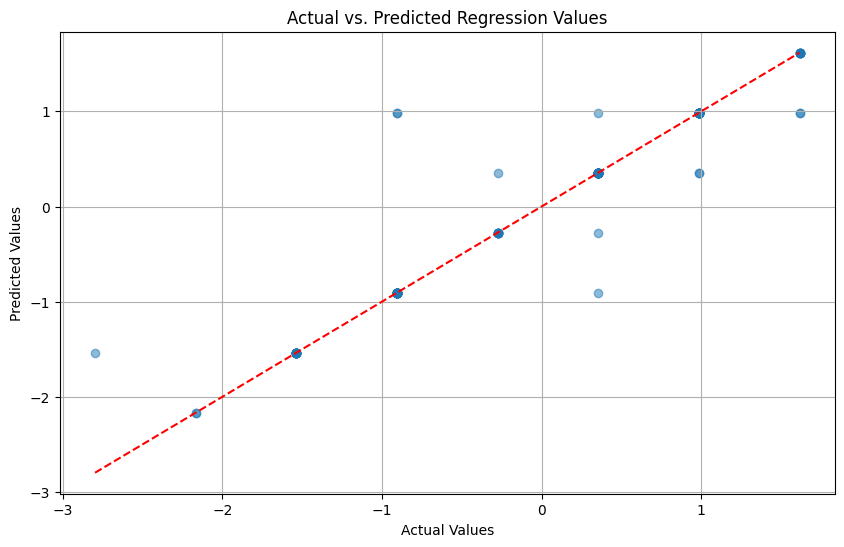

In [40]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")

print("\nPrediction Visualization:")
print("=" * 50)
plt.figure(figsize=(10, 6))

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Regression Values")
plt.grid(True)
plt.show()